In [1]:
!pip install top2vec==1.0.27 --user

In [75]:
import numpy as np 
import pandas as pd 
import os
from top2vec import Top2Vec
from word2number import w2n
import nltk
from nltk.metrics.distance import jaccard_distance
from nltk.util import ngrams

In [76]:
df = pd.read_csv('Coursera.csv', encoding = 'utf-8', encoding_errors='ignore')
df.head()

tittle             Offer by  \
0  Microsoft Azure Data Scientist Associate (DP-1...            Microsoft   
1                    Machine Learning Specialization  Stanford University   
2  Machine Learning Engineering for Production (M...      DeepLearning.AI   
3    Fundamentals of Machine Learning for Healthcare  Stanford University   
4      IBM Machine Learning Professional Certificate                  IBM   

          Level Rating                                                URL  \
0  Intermediate    4.5  https://in.coursera.org/professional-certifica...   
1      Beginner    4.9  https://in.coursera.org/specializations/machin...   
2      Advanced    4.7  https://in.coursera.org/browse/data-science/ma...   
3      Beginner    4.8  https://in.coursera.org/learn/fundamental-mach...   
4  Intermediate    4.6  https://in.coursera.org/professional-certifica...   

                                         Description  \
0  This Professional Certificate is intended for ...   
1  The Machine Learning Specialization is a found...   
2  Understanding machine learning and deep learni...   
3  Machine learning and artificial intelligence h...   
4  Machine Learning is one of the most in-demand ...   

                                              Skills  
0  Manage Azure resources for machine learning De...  
1  Decision Trees Artificial Neural Network Logis...  
2  Managing Machine Learning Production Systems D...  
3  Machine learning Biostatistics Traditional com...  
4  Artificial Intelligence (AI) Machine Learning ...

In [77]:
df.isna().sum()

tittle         0
Offer by       0
Level          0
Rating         0
URL            0
Description    0
Skills         0
dtype: int64

In [81]:
df['Content']=df['tittle']+' '+df['Description']+' '+df['Skills']
df['Content']

0       Microsoft Azure Data Scientist Associate (DP-1...
1       Machine Learning Specialization The Machine Le...
2       Machine Learning Engineering for Production (M...
3       Fundamentals of Machine Learning for Healthcar...
4       IBM Machine Learning Professional Certificate ...
                              ...                        
3605    Capstone: Retrieving, Processing, and Visualiz...
3606    Patrick Henry: Forgotten Founder �Give me libe...
3607    Business intelligence and data analytics: Gene...
3608    Rigid Body Dynamics This course teaches dynami...
3609    Architecting with Google Kubernetes Engine: Pr...
Name: Content, Length: 3610, dtype: object

In [182]:
df

tittle  \
0     Microsoft Azure Data Scientist Associate (DP-1...   
1                       Machine Learning Specialization   
2     Machine Learning Engineering for Production (M...   
3       Fundamentals of Machine Learning for Healthcare   
4         IBM Machine Learning Professional Certificate   
...                                                 ...   
3605  Capstone: Retrieving, Processing, and Visualiz...   
3606                   Patrick Henry: Forgotten Founder   
3607  Business intelligence and data analytics: Gene...   
3608                                Rigid Body Dynamics   
3609  Architecting with Google Kubernetes Engine: Pr...   

                                               Offer by         Level Rating  \
0                                             Microsoft  Intermediate    4.5   
1                                   Stanford University      Beginner    4.9   
2                                       DeepLearning.AI      Advanced    4.7   
3                                   Stanford University      Beginner    4.8   
4                                                   IBM  Intermediate    4.6   
...                                                 ...           ...    ...   
3605                             University of Michigan      Beginner    4.6   
3606                             University of Virginia  Intermediate    4.9   
3607                               Macquarie University      Advanced    4.6   
3608  Korea Advanced Institute of Science and Techno...      Beginner    4.6   
3609                                       Google Cloud  Intermediate    4.7   

                                                    URL  \
0     https://in.coursera.org/professional-certifica...   
1     https://in.coursera.org/specializations/machin...   
2     https://in.coursera.org/browse/data-science/ma...   
3     https://in.coursera.org/learn/fundamental-mach...   
4     https://in.coursera.org/professional-certifica...   
...                                                 ...   
3605  https://www.coursera.org/learn/python-data-vis...   
3606               https://www.coursera.org/learn/henry   
3607  https://www.coursera.org/learn/business-intell...   
3608  https://www.coursera.org/learn/rigid-body-dyna...   
3609  https://www.coursera.org/learn/deploying-secur...   

                                            Description  \
0     This Professional Certificate is intended for ...   
1     The Machine Learning Specialization is a found...   
2     Understanding machine learning and deep learni...   
3     Machine learning and artificial intelligence h...   
4     Machine Learning is one of the most in-demand ...   
...                                                 ...   
3605  In the capstone, students will build a series ...   
3606  �Give me liberty, or give me death:� Rememberi...   
3607  �Megatrends� heavily influence today�s organis...   
3608  This course teaches dynamics, one of the basic...   
3609  In this course, "Architecting with Google Kube...   

                                                 Skills  \
0     Manage Azure resources for machine learning De...   
1     Decision Trees Artificial Neural Network Logis...   
2     Managing Machine Learning Production Systems D...   
3     Machine learning Biostatistics Traditional com...   
4     Artificial Intelligence (AI) Machine Learning ...   
...                                                 ...   
3605  Databases  syntax  analysis  web  Data Visuali...   
3606  retirement  Causality  career  history of the ...   
3607  analytics  tableau software  Business Intellig...   
3608  Angular  Mechanical Design  fluid mechanics  F...   
3609  bigtable  bigquery  SQL  Google Cloud Platform...   

                                                Content  
0     Microsoft Azure Data Scientist Associate (DP-1...  
1     Machine Learning Specialization The Machine Le...  
2     Machine Learning Engineering for Production (M...  
3     Fundamentals o

In [183]:
df.loc[df['Level'] == "Beginner"]

tittle  \
1                       Machine Learning Specialization   
3       Fundamentals of Machine Learning for Healthcare   
5     Unsupervised Learning, Recommenders, Reinforce...   
11    Practical Decision-Making Using No-code ML on AWS   
12      Mathematics for Machine Learning Specialization   
...                                                 ...   
3599             Visual Perception and Visual Illusions   
3600  Mining Data to Extract and Visualize Insights ...   
3604  Scalable Machine Learning on Big Data using Ap...   
3605  Capstone: Retrieving, Processing, and Visualiz...   
3608                                Rigid Body Dynamics   

                                               Offer by     Level  \
1                                   Stanford University  Beginner   
3                                   Stanford University  Beginner   
5                                   Stanford University  Beginner   
11                                                  AWS  Beginner   
12                              Imperial College London  Beginner   
...                                                 ...       ...   
3599                  Saint Petersburg State University  Beginner   
3600                           Coursera Project Network  Beginner   
3604                                                IBM  Beginner   
3605                             University of Michigan  Beginner   
3608  Korea Advanced Institute of Science and Techno...  Beginner   

             Rating                                                URL  \
1               4.9  https://in.coursera.org/specializations/machin...   
3               4.8  https://in.coursera.org/learn/fundamental-mach...   
5               4.9  https://in.coursera.org/learn/unsupervised-lea...   
11    Not available       https://in.coursera.org/learn/no-code-ml-aws   
12              4.6  https://in.coursera.org/specializations/mathem...   
...             ...                                                ...   
3599  Not available    https://www.coursera.org/learn/visualperception   
3600            4.2  https://www.coursera.org/learn/data-mining-vis...   
3604            3.4  https://www.coursera.org/learn/machine-learnin...   
3605            4.6  https://www.coursera.org/learn/python-data-vis...   
3608            4.6  https://www.coursera.org/learn/rigid-body-dyna...   

                                            Description  \
1     The Machine Learning Specialization is a found...   
3     Machine learning and artificial intelligence h...   
5     In the third course of the Machine Learning Sp...   
11    In this course, you will discover how to solve...   
12    For a lot of higher level courses in Machine L...   
...                                                 ...   
3599  Vision is one of the main ways for us to gathe...   
3600  By the end of this project, you will learn how...   
3604  This course will empower you with the skills t...   
3605  In the capstone, students will build a series ...   
3608  This course teaches dynamics, one of the basic...   

                                                 Skills  \
1     Decision Trees Artificial Neural Network Logis...   
3     Machine learning Biostatistics Traditional com...   
5     Collaborative Filtering Unsupervised Learning ...   
11    Business Analytics Artificial Intelligence (AI...   
12    Eigenvalues And Eigenvectors Principal Compone...   
...                                                 ...   
3599  goms  art  learnability  cognitive behavioral ...   
3600  Python Programming  analysis  General Statisti...   
3604  Apache  Human Learning  scalability  functiona...   
3605  Databases  syntax  analysis  web  Data Visuali...   
3608  Angular  Mechanical Design  fluid mechanics  F...   

                                                Content  
1     Machine Learning Specialization The Machine Le...  
3     Fundamentals of Machine Learning for Healthcar...  
5     Unsupervised Learning, R

In [83]:
df1 = df.Content.values.tolist()
type(df)

pandas.core.frame.DataFrame

In [84]:
len(df1)

3610

In [85]:
df1

['Microsoft Azure Data Scientist Associate (DP-100) Professional Certificate This Professional Certificate is intended for data scientists with existing knowledge of Python and machine learning frameworks like Scikit-Learn, PyTorch, and Tensorflow, who want to build and operate machine learning solutions in the cloud. This Professional Certificate teaches learners how to create end-to-end solutions in Microsoft Azure. They will learn how to manage Azure resources for machine learning; run experiments and train models; deploy and operationalize machine learning solutions; and implement responsible machine learning. They will also learn to use Azure Databricks to explore, prepare, and model data; and integrate Databricks machine learning processes with Azure Machine Learning.\n\nThis program consists of 5 courses to help prepare you to take the Exam DP-100: Designing and Implementing a Data Science Solution on Azure. The certification exam is an opportunity to prove knowledge and experti

In [86]:
df1[:1]

['Microsoft Azure Data Scientist Associate (DP-100) Professional Certificate This Professional Certificate is intended for data scientists with existing knowledge of Python and machine learning frameworks like Scikit-Learn, PyTorch, and Tensorflow, who want to build and operate machine learning solutions in the cloud. This Professional Certificate teaches learners how to create end-to-end solutions in Microsoft Azure. They will learn how to manage Azure resources for machine learning; run experiments and train models; deploy and operationalize machine learning solutions; and implement responsible machine learning. They will also learn to use Azure Databricks to explore, prepare, and model data; and integrate Databricks machine learning processes with Azure Machine Learning.\n\nThis program consists of 5 courses to help prepare you to take the Exam DP-100: Designing and Implementing a Data Science Solution on Azure. The certification exam is an opportunity to prove knowledge and experti

In [87]:
model = Top2Vec(documents=df1, speed="learn", workers=8)

2022-12-01 14:29:36,795 - top2vec - INFO - Pre-processing documents for training
2022-12-01 14:29:38,089 - top2vec - INFO - Creating joint document/word embedding
2022-12-01 14:29:55,654 - top2vec - INFO - Creating lower dimension embedding of documents
2022-12-01 14:30:15,103 - top2vec - INFO - Finding dense areas of documents
2022-12-01 14:30:15,201 - top2vec - INFO - Finding topics


In [88]:
model.get_num_topics()

51

In [89]:
model.topic_words

array([['disease', 'health', 'epidemiology', ..., 'communities',
        'reflect', 'crisis'],
       ['history', 'political', 'war', ..., 'today', 'st', 'themes'],
       ['financial', 'finance', 'valuation', ..., 'construction',
        'optimal', 'calculate'],
       ...,
       ['stock', 'finance', 'investment', ..., 'spreadsheet', 'pricing',
        'offer'],
       ['solar', 'energy', 'electrical', ..., 'materials', 'achieve',
        'costs'],
       ['robotics', 'mechanical', 'mechanics', ..., 'quantum',
        'astronomy', 'circuit']], dtype='<U15')

In [90]:
topic_sizes, topic_nums, a = model.get_topics(44)

In [91]:
topic_words, word_scores, topic_nums = model.get_topics(50)

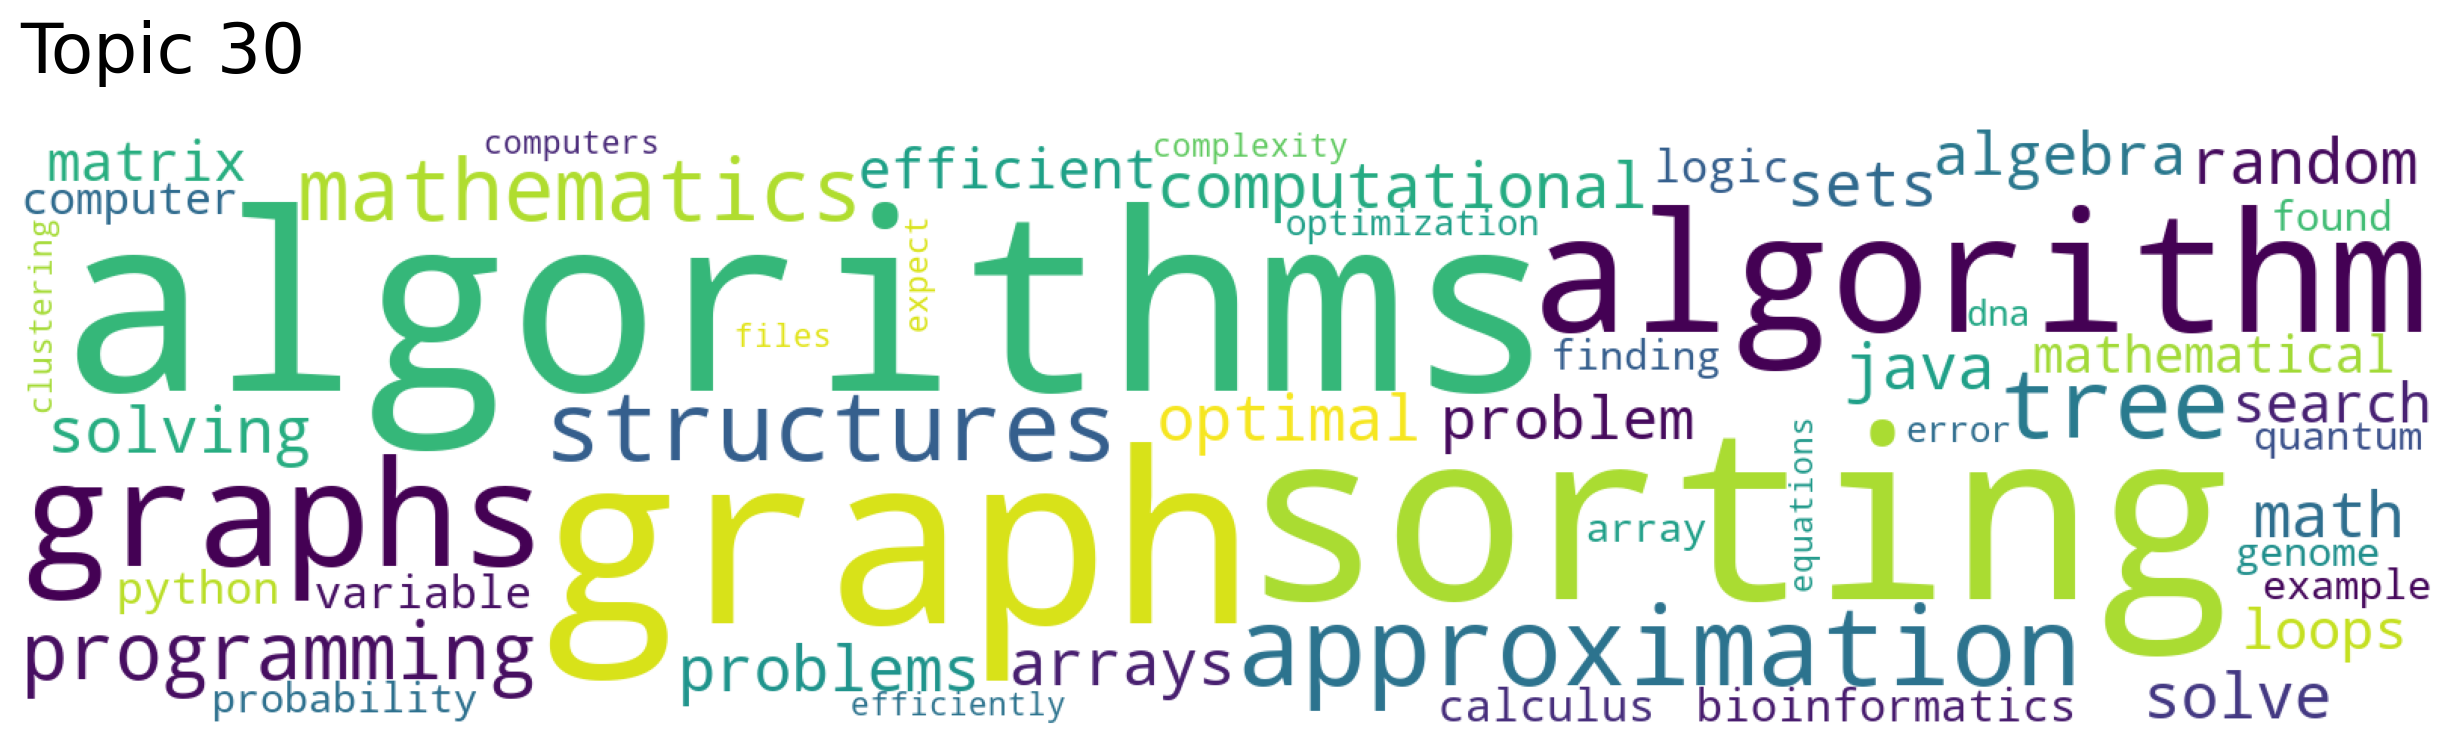

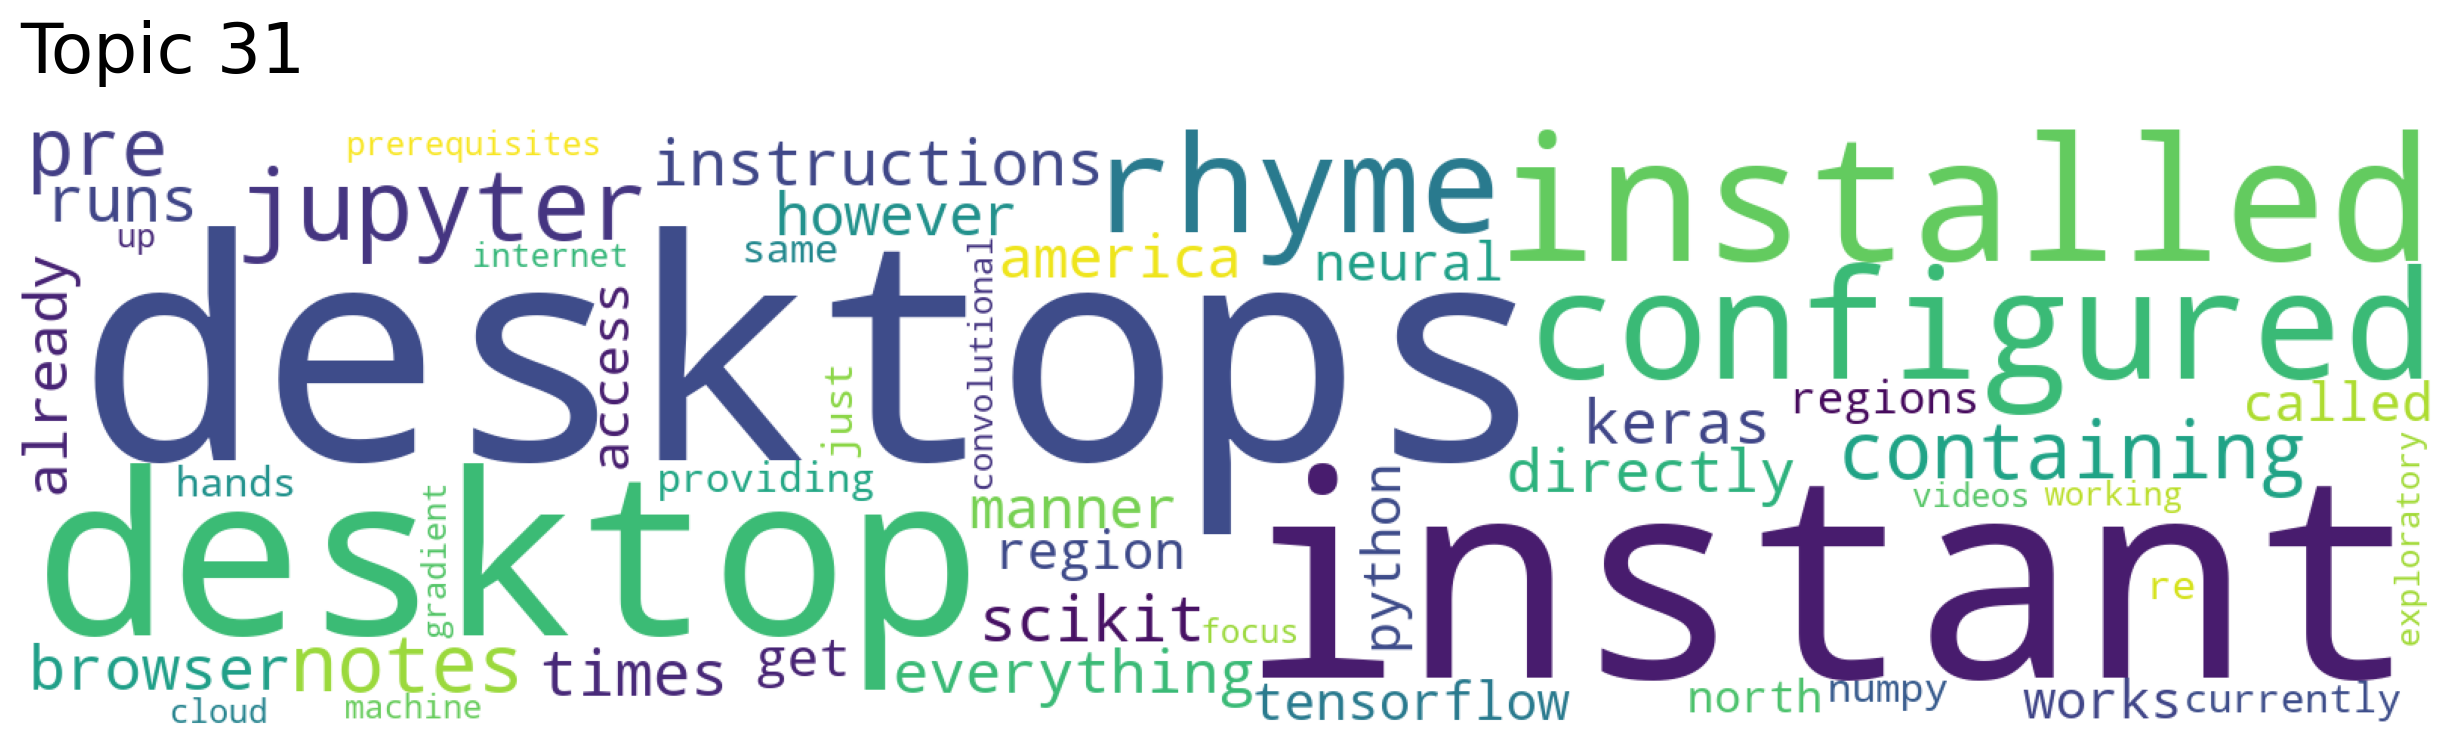

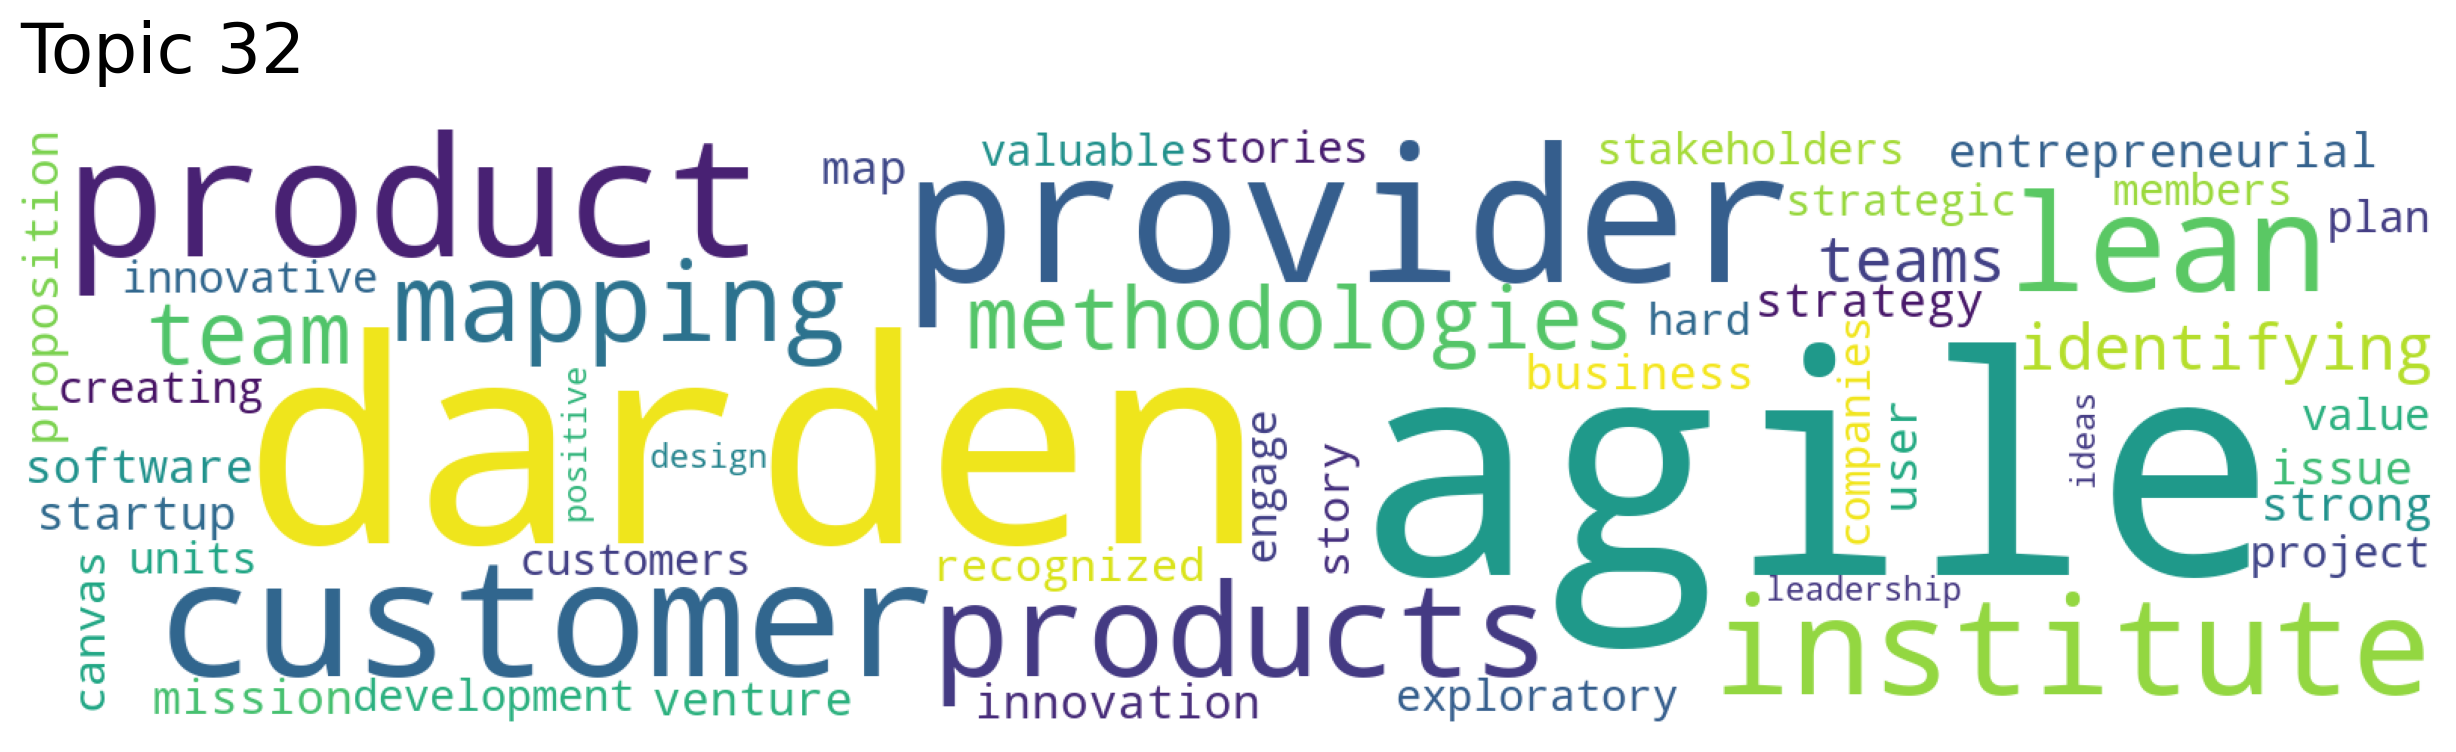

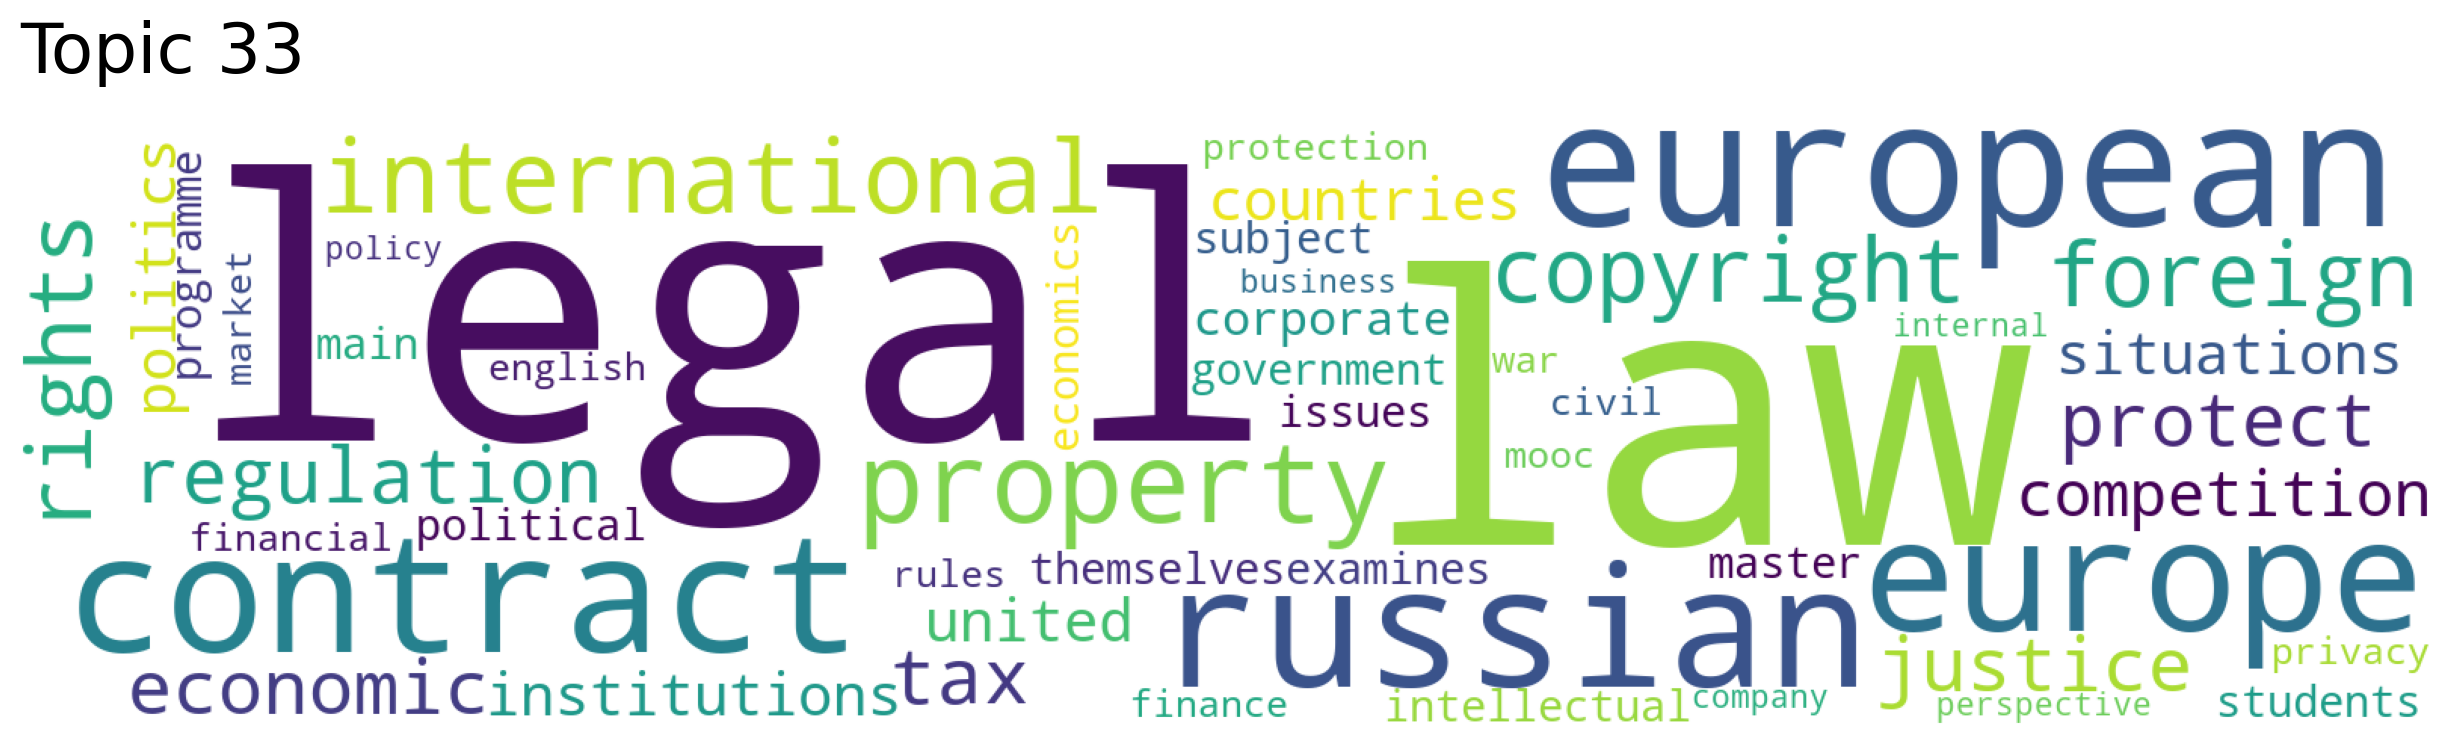

In [92]:
for topic in topic_nums[30:34]:
    model.generate_topic_wordcloud(topic, background_color="white")

In [93]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["machine"], num_topics=5)

In [94]:
topic_scores

array([0.52546706, 0.47658575, 0.47497494, 0.4168802 , 0.33043312])

In [95]:
topic_nums

array([26, 24, 23, 34, 31], dtype=int64)

In [96]:
topic_words

[array(['supervised', 'regression', 'predictive', 'logistic', 'machine',
        'classification', 'scikit', 'modelling', 'prediction', 'models',
        'linear', 'clustering', 'random', 'gradient', 'statistical',
        'statistics', 'validation', 'exploratory', 'algorithms', 'model',
        'recommender', 'missing', 'predict', 'predictions', 'python',
        'sets', 'dataset', 'data', 'neural', 'train', 'numpy',
        'techniques', 'feature', 'probability', 'datasets', 'tree',
        'vector', 'cluster', 'learning', 'metrics', 'approximation', 'sas',
        'analytics', 'algorithm', 'artificial', 'keras', 'pipeline',
        'visualize', 'error', 'variables'], dtype='<U15'),
 array(['neural', 'convolutional', 'tensorflow', 'deep', 'artificial',
        'keras', 'train', 'networks', 'ai', 'machine', 'trained',
        'learning', 'vision', 'gradient', 'classification', 'recognition',
        'detection', 'processing', 'models', 'image', 'dataset', 'python',
        'images', '

In [97]:
word_scores

[array([0.67415875, 0.6208969 , 0.5983992 , 0.53615975, 0.5254673 ,
        0.52309334, 0.5224518 , 0.48434135, 0.45308045, 0.44750965,
        0.44512728, 0.44408268, 0.4430619 , 0.44262093, 0.44210544,
        0.42142838, 0.41487658, 0.4111853 , 0.4048983 , 0.38762015,
        0.38643256, 0.38629898, 0.38470438, 0.37772694, 0.3767687 ,
        0.36351246, 0.35916352, 0.3587583 , 0.355241  , 0.34750652,
        0.3448628 , 0.3409586 , 0.3401429 , 0.3268221 , 0.3265612 ,
        0.32231992, 0.317708  , 0.3136065 , 0.31342638, 0.31225803,
        0.30847996, 0.30759025, 0.30293772, 0.29653478, 0.2960803 ,
        0.29479814, 0.29314965, 0.29294983, 0.2918767 , 0.29098293],
       dtype=float32),
 array([0.7555219 , 0.73323137, 0.70946926, 0.7086917 , 0.58026195,
        0.56873226, 0.5274642 , 0.52638036, 0.5238262 , 0.4765857 ,
        0.43954244, 0.43247882, 0.42291006, 0.40685037, 0.40273637,
        0.38480413, 0.38052592, 0.37484887, 0.36138684, 0.3595844 ,
        0.35519433, 0.35

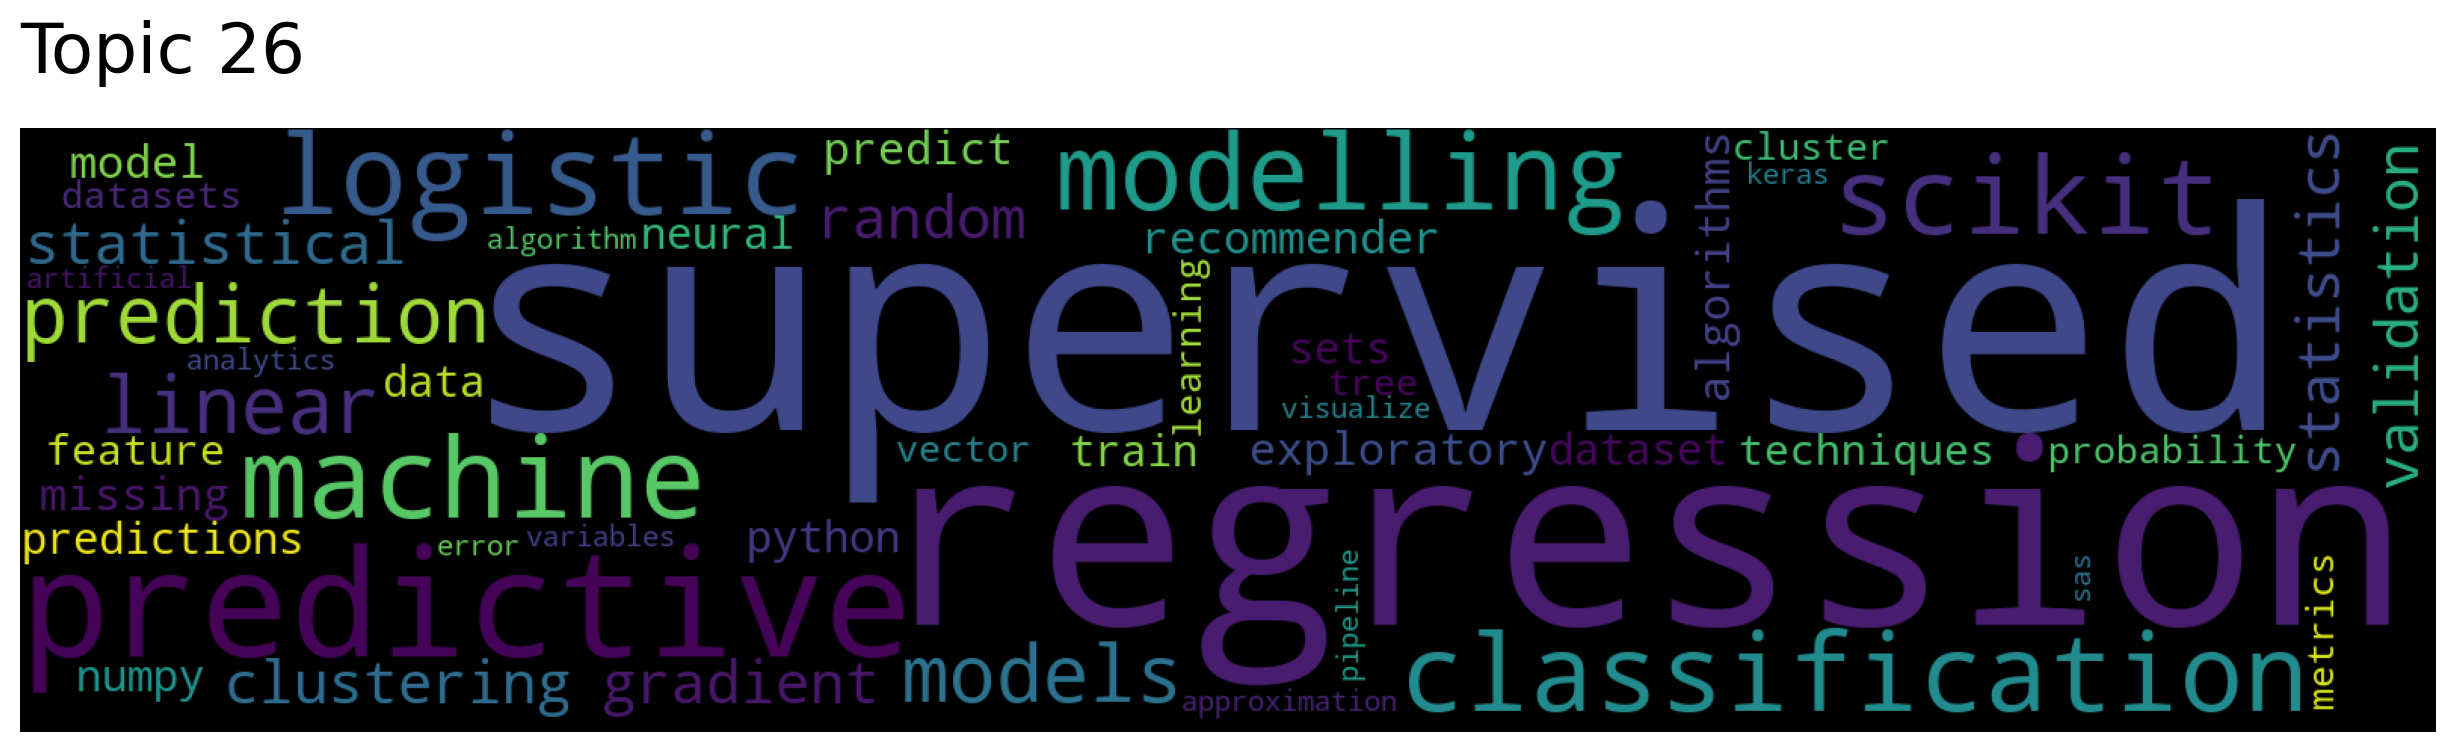

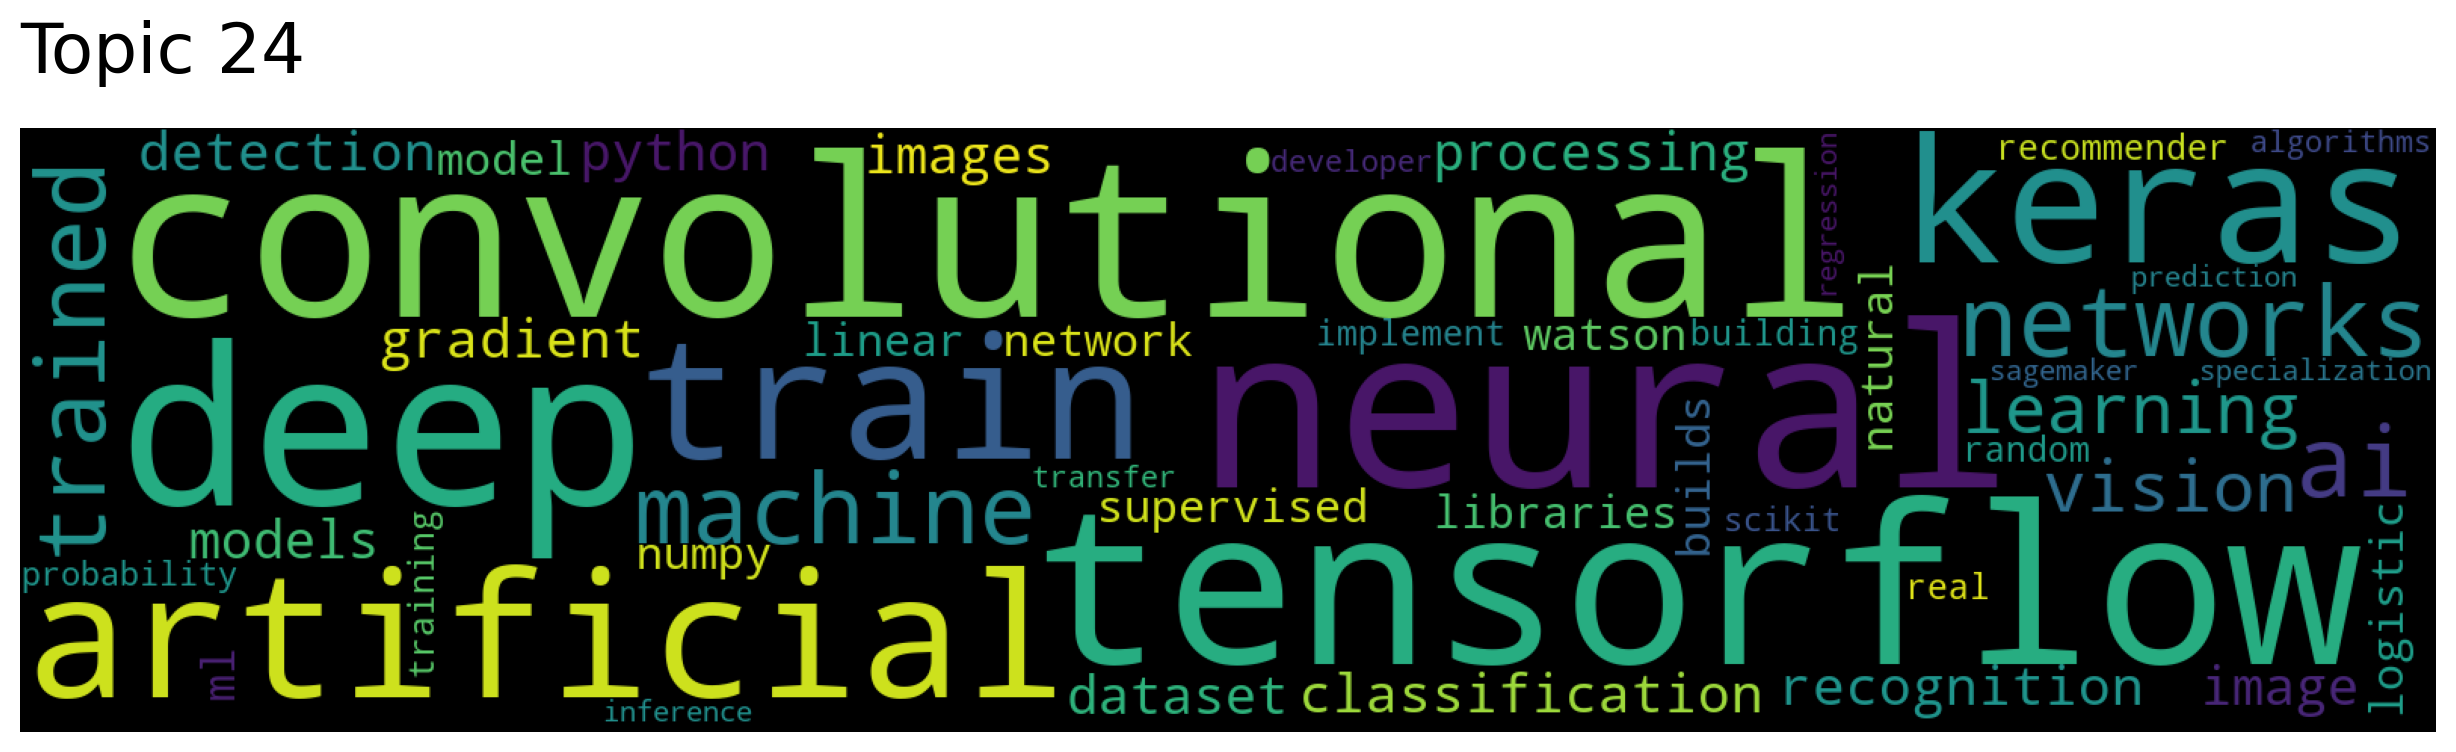

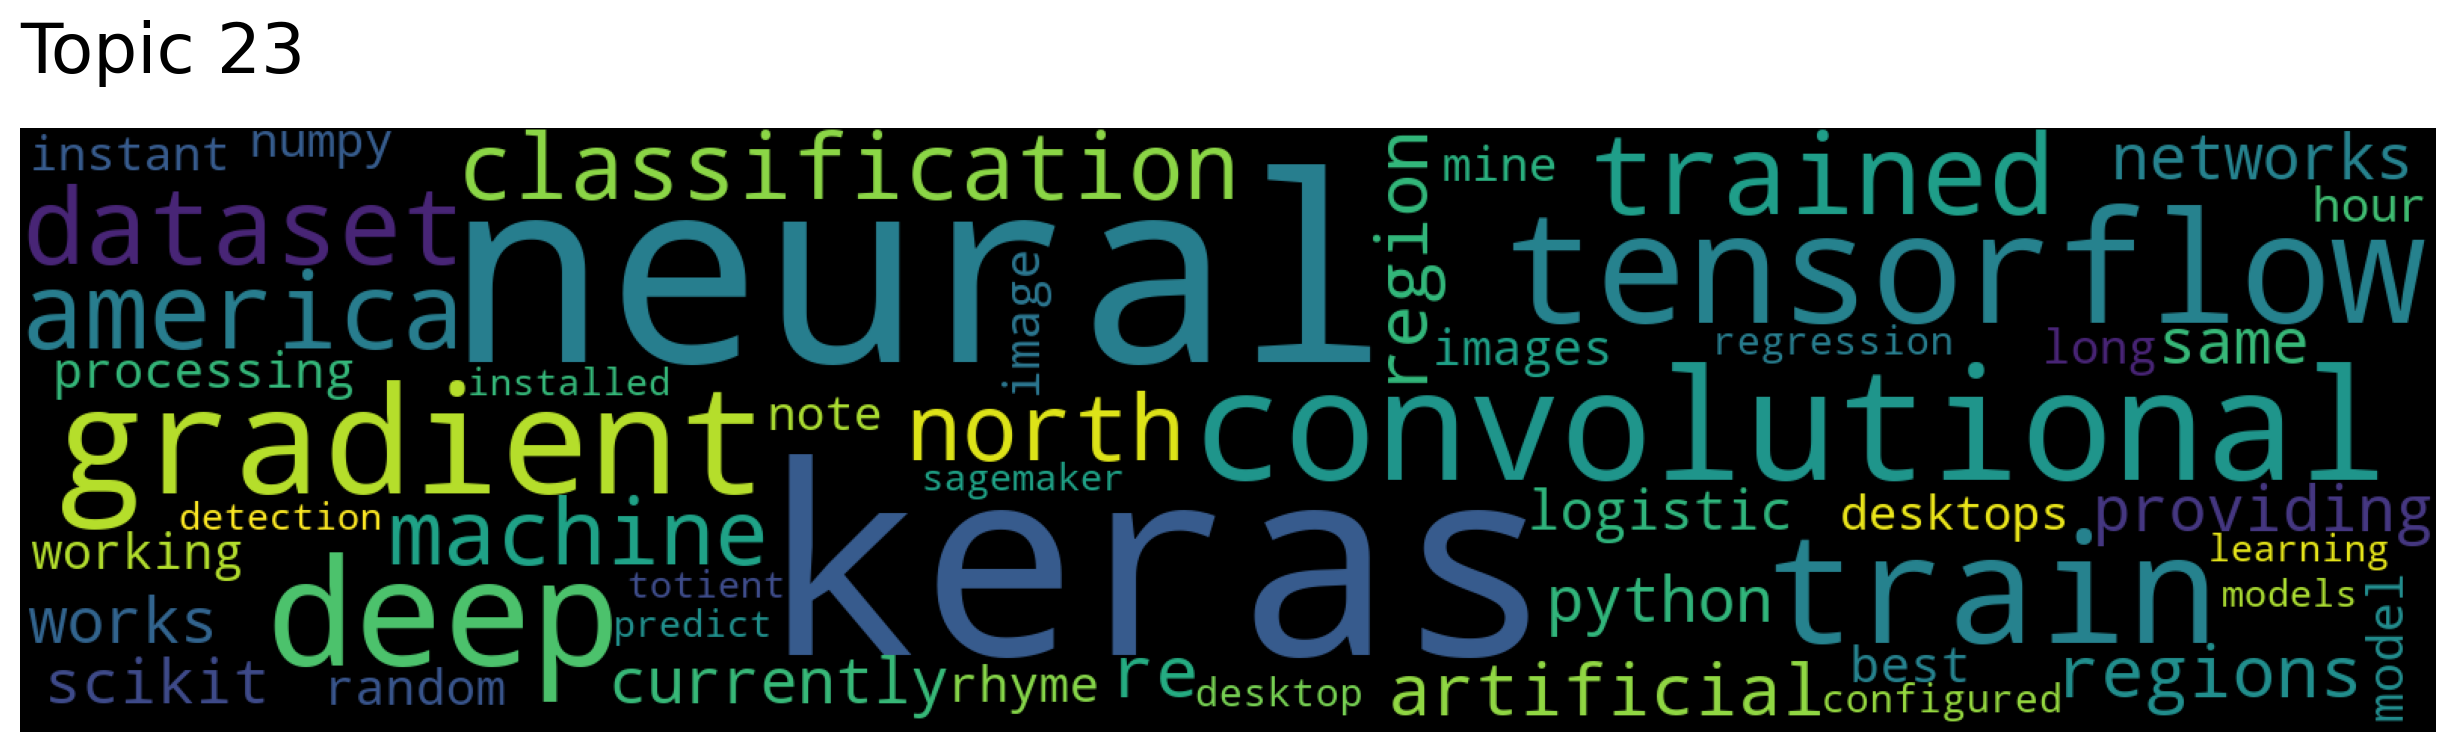

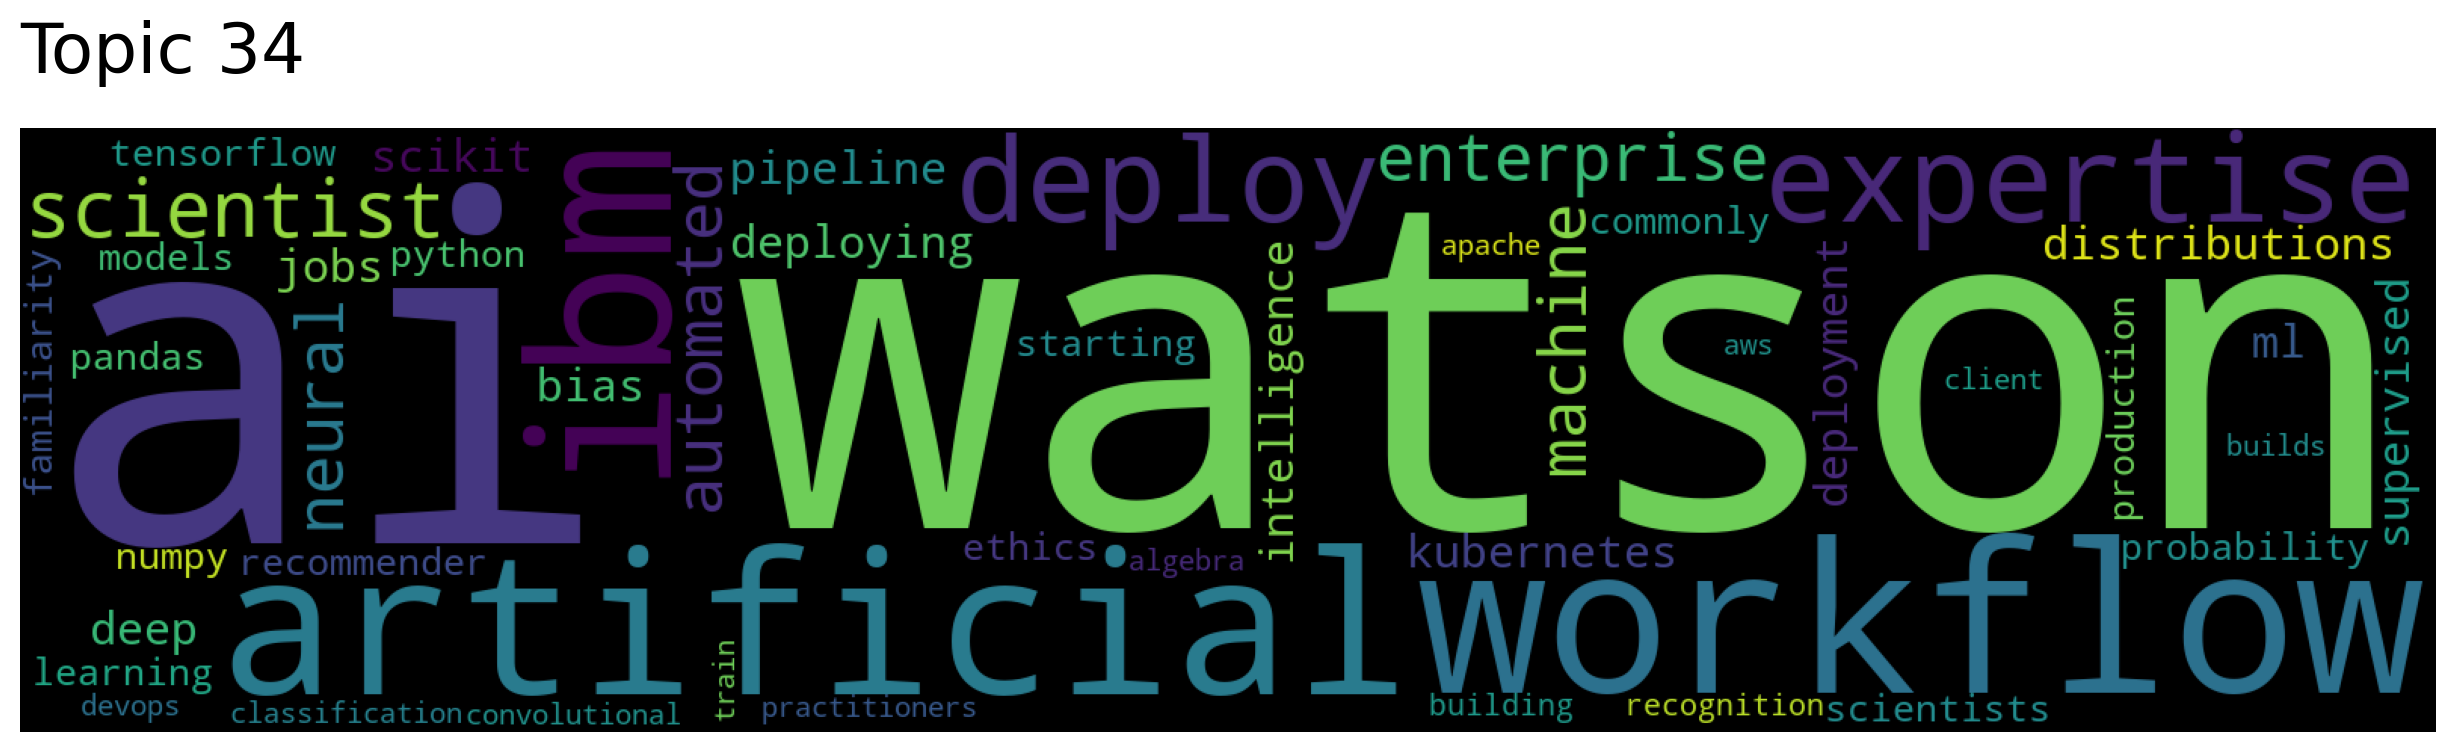

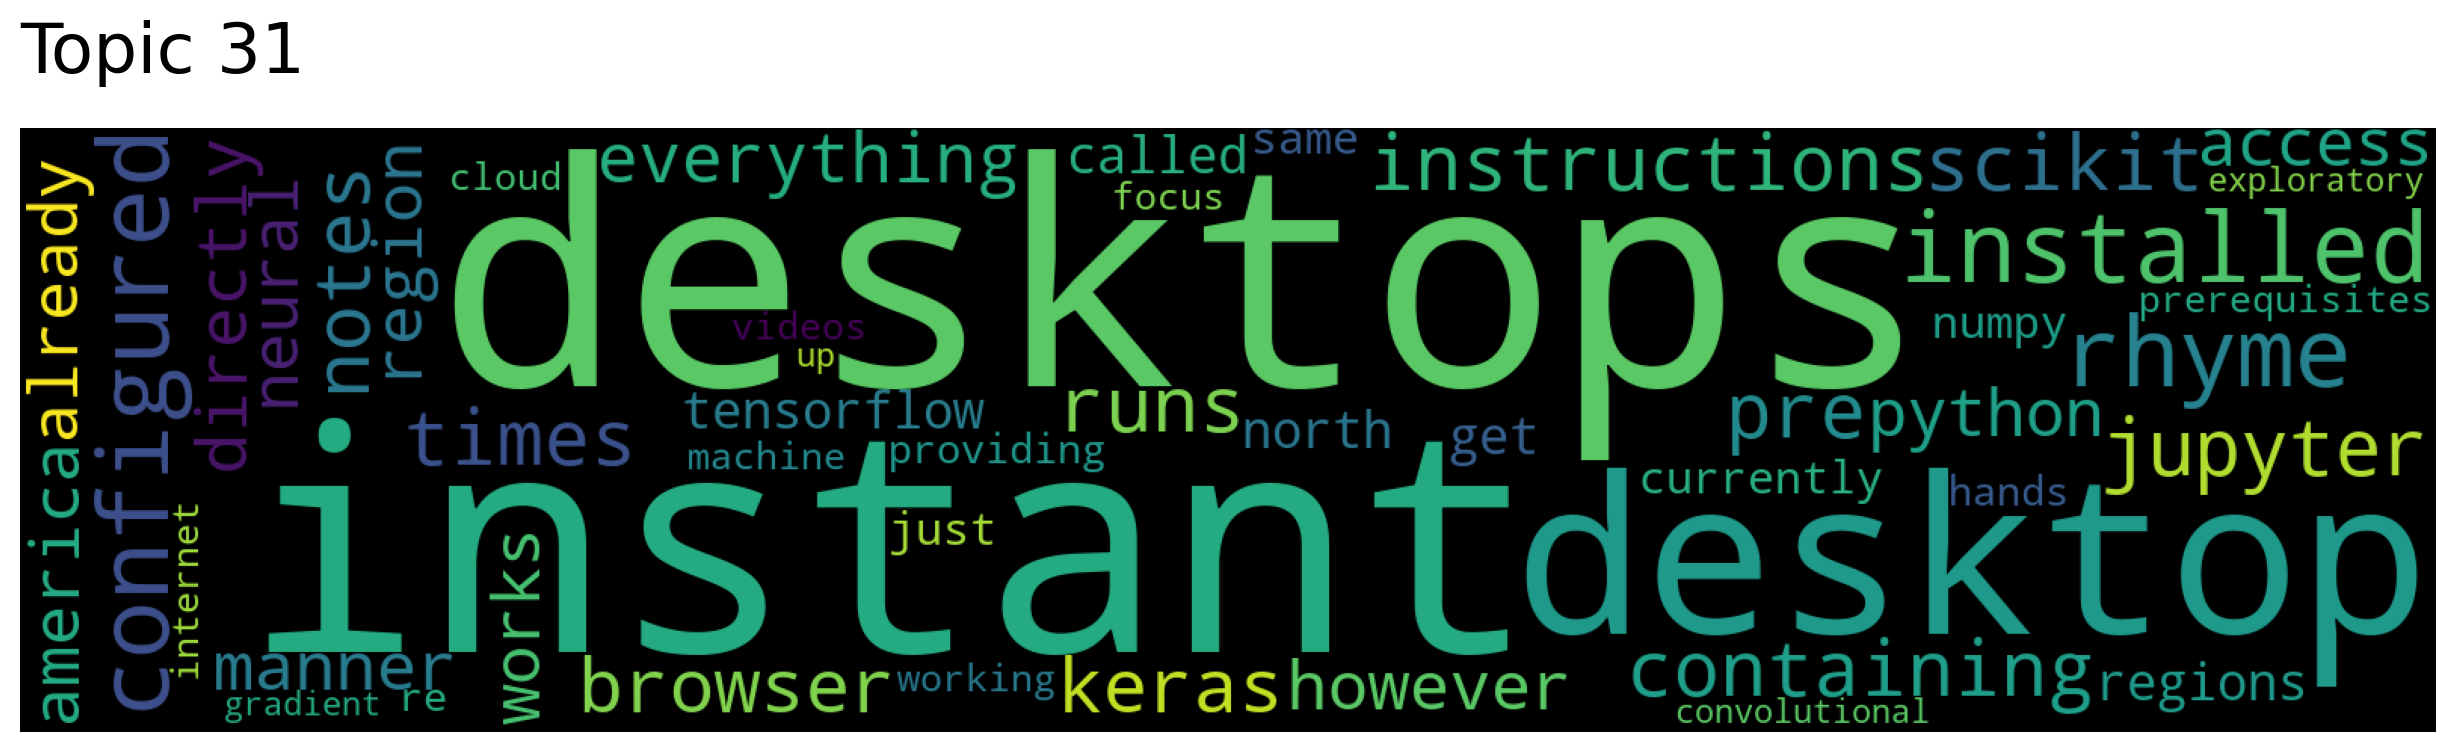

In [98]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["machine"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [99]:
words, word_scores = model.similar_words(keywords=["intermediate"], keywords_neg=[], num_words=10)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

perfect 0.358265296246979
advanced 0.33118757673185706
adding 0.32191886667439756
should 0.3191440448914984
unity 0.31809755604541834
first 0.31703696868807135
ready 0.31399000777913233
grammar 0.295791644122539
intended 0.2903897559159559
succeed 0.2894822742003073


In [106]:
print(df.iloc[0]['URL'])

https://in.coursera.org/professional-certificates/azure-data-scientist


In [115]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["stock", "learning", "python"], num_docs=6)

for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score} ")
    print(f"URL:", df.iloc[doc_id]['URL'])
    print(f"Tittle:", df.iloc[doc_id]['tittle'])
    print("-----Description------")
    print(doc)
    print("-----------")
    print()


Document: 1728, Score: 0.49073827266693115 
URL: https://www.coursera.org/learn/dimensionality-reduction-autoencoder-python
Tittle: Dimensionality Reduction using an Autoencoder in Python
-----Description------
Dimensionality Reduction using an Autoencoder in Python In this 1-hour long project, you will learn how to generate your own high-dimensional dummy dataset. You will then learn how to preprocess it effectively before training a baseline PCA model. You will learn the theory behind the autoencoder, and how to train one in scikit-learn. You will also learn how to extract the encoder portion of it to reduce dimensionality of your input data. In the course of this project, you will also be exposed to some basic clustering strength metrics.  Note: This course works best for learners who are based in the North America region. We�re currently working on providing the same experience in other regions. Scikit-Learn  project  preprocessor  Python Programming  Machine Learning  Artificial N

In [25]:
nltk.download('words')
from nltk.corpus import words
correct_words = words.words()

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [26]:
def jaccard_distance(label1, label2):
    if len(label1.union(label2)) ==0:
           a = 0
    else:
        a = (len(label1.union(label2)) - len(label1.intersection(label2))) / len(label1.union(label2))
    return a

In [27]:
def correcting_word(keyword):
    list_word =[]
    for word in keyword:
        temp = [(jaccard_distance(set(ngrams(word, 2)),set(ngrams(w, 2))),w) for w in correct_words if w[0]==word[0]]
        #print(temp)
        correct= sorted(temp, key = lambda x:x[0])[0][1]
        list_word.append(correct)
    return list_word
    

In [184]:
keyword = ['health']
correcting_word(keyword)

['health']

In [185]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=keyword, num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score} ")
    print(f"URL:", df.iloc[doc_id]['URL'])
    print(f"Tittle:", df.iloc[doc_id]['tittle'])
    print("-----Description------")
    print(doc)
    print("-----------")
    print()

Document: 2314, Score: 0.5582073926925659 
URL: https://www.coursera.org/learn/public-health-depression
Tittle: Major Depression in the Population: A Public Health Approach
-----Description------
Major Depression in the Population: A Public Health Approach Public Mental Health is the application of the principles of medicine and social science to prevent the occurrence of mental and behavioral disorders and to promote mental health of the population. This course illustrates the principles of public health applied to depressive disorder, including principles of epidemiology, transcultural psychiatry, health services research, and prevention. It is predicted that by 2020 depressive disorder will be the most important cause of disease burden in the entire world! Every human being suffers from feeling depressed at some point or other, but only about one fifth of the population will experience an episode of depressive disorder over the course of their lives. This course illuminates the publ

In [156]:
query= '3 health'

In [175]:
def get_recommendation(query, fil):
    word_list = query.split(" ")
    key_list = []
    number = 10
    for key in list(word_list):
        try:
            if w2n.word_to_num(key):
                number = w2n.word_to_num(key)
            else:
                break
        except ValueError:
            key_list.append(key)
    key_correct = correcting_word(key_list)
    try:
        documents, document_scores, document_ids = model.search_documents_by_keywords(keywords= key_correct, num_docs=number)
        for doc, score, doc_id in zip(documents, document_scores, document_ids):
            print(f"Document: {doc_id}, Score: {score} ")
            print(f"URL:", df.iloc[doc_id]['URL'])
            print(f"Tittle:", df.iloc[doc_id]['tittle'])
            print("-----Description------")
            print(doc)
            print("-----------")
            print()
    except ValueError as e:
        print("You mean the keywords are", key_correct)
        print(e, "Please use other keyword!")

In [178]:
query = input("Please enter the query: [number] + keywords: ")
get_recommendation(query)

Please enter the query: [number] + keywords: 3 machine learning sports pyth
Document: 757, Score: 0.4809980094432831 
URL: https://www.coursera.org/learn/mining-quality-prediction
Tittle: Mining Quality Prediction Using Machine & Deep Learning
-----Description------
Mining Quality Prediction Using Machine & Deep Learning In this 1.5-hour long project-based course, you will be able to: - Understand the theory and intuition behind Simple and Multiple Linear Regression. - Import Key python libraries, datasets and perform data visualization - Perform exploratory data analysis and standardize the training and testing data. - Train and Evaluate different regression models using Sci-kit Learn library. - Build and train an Artificial Neural Network to perform regression. - Understand the difference between various regression models KPIs such as MSE, RMSE, MAE, R2, and adjusted R2. - Assess the performance of regression models and visualize the performance of the best model using various KPIs. 

In [153]:
title = '3 machine learning pyth'
word_list = title.split(" ")
print(word_list)
w2n.word_to_num(word_list[0])

['3', 'machine', 'learning', 'pyth']


3

In [154]:
word_list = title.split(" ")
key_list = []
for key in list(word_list):
    try:
        if w2n.word_to_num(key):
            number = w2n.word_to_num(key)
        else:
            break
    except ValueError:
        key_list.append(key)
print(number)
print(key_list)

3
['machine', 'learning', 'pyth']


In [162]:
query = input("Please enter the query: [number] + keywords: ")
get_recommendation(query)

Please enter the query: [number] + keywords: 3 machin learni pyth
'machin' has not been learned by the model so it cannot be searched.
Please use other keyword!
